<a href="https://colab.research.google.com/github/tesa0/Katerina-Treskova/blob/main/DFpreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/MA/t1_20220101_20220726_rg_201589066.csv'            # счетчик 1.1, цель 201589066, 22-01-01 - 22-07-26 visits

df1 = pd.read_csv(file_path1, header=0)
col1= list(df1.columns) # счетчик 1.1, цель 201589066, 22-01-01 - 22-07-26 visits
# df1.columns
df1 = df1.drop(['Unnamed: 0.1','Unnamed: 0','ym:s:from','ym:s:lastSocialNetworkProfile',
                'ym:s:lastSocialNetwork','ym:s:openstatAd','ym:s:openstatCampaign','ym:s:openstatService',
                'ym:s:openstatSource','ym:s:browserCountry','ym:s:firstGCLID','ym:s:lastDirectClickOrder',
                'ym:s:lastDirectPlatform','ym:s:lastGCLID','ym:s:lastReferalSource',
                'ym:s:lastSignificantGCLID','ym:s:networkType', 'ym:s:referer','ym:s:regionCity',
                'ym:s:UTMCampaign','ym:s:UTMContent','ym:s:UTMSource','ym:s:UTMTerm','ym:s:browserLanguage',
                'ym:s:cookieEnabled','ym:s:goalsPrice','ym:s:goalsSerialNumber',
                'ym:s:ipAddress','ym:s:impressionsProductCoupon','ym:s:offlineCallHoldDuration',
                'ym:s:offlineCallMissed','ym:s:offlineCallURL','ym:s:watchIDs'], axis=1)


Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,39,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df1['ym:s:lastDirectBannerGroup'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectBannerGroup']]

df1['ym:s:offlineCallTag'] = ['1' if '1' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '2' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '3' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = ['1' if '4' in el else el for el in df1['ym:s:offlineCallTag']]
df1['ym:s:offlineCallTag'] = [1 if '1' in el else 0 for el in df1['ym:s:offlineCallTag']]

df1['ym:s:endURL'] = [x[7:] for x in df1['ym:s:endURL']]
df1['ym:s:startURL'] = [x[9:] for x in df1['ym:s:startURL']]

df1['ym:s:offlineCallTalkDuration'] = [x[1:-1] for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = [x.replace("''","") for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = ['0' if x == '' else max(x.split(',')) for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = [int(x) for x in df1['ym:s:offlineCallTalkDuration']]
df1['ym:s:offlineCallTalkDuration'] = df1['ym:s:offlineCallTalkDuration']/max(df1['ym:s:offlineCallTalkDuration'])

df1['ym:s:diagonal'] = ((df1['ym:s:screenHeight']**2+df1['ym:s:screenWidth']**2)**0.5)
df1['ym:s:diagonal'] = round(df1['ym:s:diagonal'] / max(df1['ym:s:diagonal']),2)

df1 = df1.drop(['ym:s:screenHeight', 'ym:s:screenWidth'], axis=1)

df1['ym:s:lastDirectClickBanner'] = [0 if el==0 else 1 for el in df1['ym:s:lastDirectClickBanner']]

df1['ym:s:lastDirectClickBannerName'] = [x[26:] for x in df1['ym:s:lastDirectClickBannerName']]
df1['ym:s:lastDirectClickBannerName'] = [int(x) for x in df1['ym:s:lastDirectClickBannerName']]
df1['ym:s:lastDirectClickBannerName'] = round((df1['ym:s:lastDirectClickBannerName'])/max(df1['ym:s:lastDirectClickBannerName']),2)

df1['ym:s:visitDuration'] = round((df1['ym:s:visitDuration'])/max(df1['ym:s:visitDuration']),2)

df1['ym:s:lastClickBannerGroupName'] = [el.lower() for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['2022' if '2022' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['фили' if 'фили' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['Headliner' if 'headliner' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['застройщик' if 'застройщик' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['Не отказ' if 'не отказ' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['конкурент' if 'конкурент' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['запрос' if 'запрос' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['2021' if '2021' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['жк' if 'жк' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['центр сити' if 'центр сити' in el else el for el in df1['ym:s:lastClickBannerGroupName']]
df1['ym:s:lastClickBannerGroupName'] = ['москва' if 'москв' in el else el for el in df1['ym:s:lastClickBannerGroupName']]

df1['ym:s:lastDirectPhraseOrCond'] = [x[23:] for x in df1['ym:s:lastDirectPhraseOrCond']]

import datetime
from datetime import datetime
df1['ym:s:date'] = [pd.to_datetime(x) for x in df1['ym:s:date']]

df1['ym:s:goalsDateTime'] = [x.replace("[","") for x in df1['ym:s:goalsDateTime']]
df1['ym:s:goalsDateTime'] = [x.replace("]","") for x in df1['ym:s:goalsDateTime']]
df1['ym:s:goalsDateTime'] = [x[2:12] for x in df1['ym:s:goalsDateTime']]
df1 = df1.drop(df1[df1['ym:s:goalsDateTime']==''].index) # ---------------------------------------------
df1['ym:s:goalsDateTime'] = [datetime.strptime(x, '%Y-%m-%d') for x in df1['ym:s:goalsDateTime']]

df1['ym:s:deltaTime'] = df1['ym:s:goalsDateTime'] - df1['ym:s:date']
df1['ym:s:deltaTime'] = [x.components.days for x in df1['ym:s:deltaTime']]
df1['ym:s:deltaTime'] = df1['ym:s:deltaTime']/max(df1['ym:s:deltaTime'] )

df1 = df1.drop(['ym:s:date', 'ym:s:goalsDateTime'], axis=1)

# модель с учителем
df1['Y'] = [1 if '201589066' in el else 0 for el in df1['ym:s:goalsID']]
df1 = df1.drop(['ym:s:visitID','ym:s:clientID','ym:s:goalsID'], axis=1)
df1 = df1.dropna(axis=1)

In [4]:
# will be categories :
# Названия колонок которые необходимо закодирвать
cols_encode = ['ym:s:lastAdvEngine', 'ym:s:deviceCategory', 'ym:s:hasGCLID', 'ym:s:isNewUser', 
               'ym:s:javascriptEnabled', 'ym:s:lastDirectBannerGroup', 'ym:s:lastDirectClickBanner',
               'ym:s:offlineCallTag','ym:s:pageViews','ym:s:screenOrientation','ym:s:startURL',
               'ym:s:endURL','ym:s:bounce','ym:s:lastClickBannerGroupName','ym:s:lastClickBannerGroupName',
               'ym:s:lastDirectClickOrderName','ym:s:lastDirectPhraseOrCond', 'ym:s:lastTrafficSource'] 
df1[cols_encode].replace(pd.NA,'empty') 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in cols_encode:
  df1[col]=le.fit_transform(df1[col])

# df1[cols_encode]
df1['Y'].value_counts()

0    121641
1      1307
Name: Y, dtype: int64

In [5]:
# numbers too big
col_big_nums = ['ym:s:endURL', 'ym:s:lastDirectPhraseOrCond','ym:s:startURL','ym:s:lastDirectClickOrderName','ym:s:lastClickBannerGroupName']
df1 = df1.drop(col_big_nums, axis=1)
# df1.describe().transpose()[['count',	'mean',	'std',	'min', 'max']] 
df1['Y'].value_counts()

0    121641
1      1307
Name: Y, dtype: int64

In [6]:
# что осталосьобработать: на время можно удалить из модели

# for el in [ 'ym:s:lastDirectClickOrderName']:
#        print(len(df1))
#        print(df1[el].unique()[:5])


In [7]:
df1 = df1.drop(['ym:s:offlineCallFirstTimeCaller'], axis=1)
df1['Y'].value_counts()

0    121641
1      1307
Name: Y, dtype: int64

In [12]:
# df1.to_csv (r'/content/drive/MyDrive/MA/ma1.csv', index = False, header=True)
df1

,ym:s:bounce,ym:s:deviceCategory,ym:s:hasGCLID,ym:s:isNewUser,ym:s:javascriptEnabled,ym:s:lastAdvEngine,ym:s:lastDirectBannerGroup,ym:s:lastDirectClickBanner,ym:s:lastDirectClickBannerName,ym:s:lastTrafficSource,ym:s:offlineCallTag,ym:s:offlineCallTalkDuration,ym:s:pageViews,ym:s:screenOrientation,ym:s:visitDuration,ym:s:diagonal,ym:s:deltaTime,Y
68490,0,1,0,0,1,7,1,1,0.02,0,0,0.0,3,1,0.00,0.14,0.0,0
88946,0,0,0,0,1,5,0,0,0.00,0,0,0.0,5,2,0.00,0.24,0.0,0
67382,0,1,0,1,1,5,0,0,0.00,0,0,0.0,1,1,0.00,0.13,0.0,0
96378,0,1,0,1,1,5,0,0,0.00,0,0,0.0,2,1,0.00,0.15,0.0,0
14558,0,1,0,1,1,8,0,1,0.05,6,0,0.0,2,1,0.02,0.13,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0,0,1,1,8,0,0,0.00,1,0,0.0,8,2,0.02,0.26,0.0,0
103694,0,0,0,1,1,8,0,0,0.00,1,0,0.0,2,2,0.00,0.27,0.0,0
860,0,0,0,0,1,2,0,0,0.00,0,0,0.0,1,2,0.00,0.22,0.0,0
15795,0,0,0,1,1,7,1,1,0.04,0,0,0.0,1,2,0.00,0.28,0.0,0


Model sequential

In [1]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 
from tensorflow.keras import utils   
from tensorflow.keras.optimizers import Adam, Adadelta 
import numpy as np 
import pandas as pd     
import matplotlib.pyplot as plt     
from sklearn import preprocessing        
from sklearn.metrics import precision_recall_curve, classification_report
%matplotlib inline
from tensorflow.keras.callbacks import ModelCheckpoint,Callback,BackupAndRestore
# from google.colab import drive
# drive.mount('/content/drive')
# file_path1='/content/drive/MyDrive/MA/ma1.csv'
# df1 = pd.read_csv(file_path1, header=0)
df1['Y'].value_counts()

Mounted at /content/drive


0    121641
1      1307
Name: Y, dtype: int64

In [2]:
from sklearn.utils import shuffle
df1 = shuffle(df1,random_state=42)

df1_1 = df1[df1['Y']==1]
# print(len(df1_0),len(df1_1))
df1_0 = df1[df1['Y']==0][:1307] # проверяем на модели 
len(df1_0)
df1_all = pd.concat([df1_0,df1_1], axis=0)
cols = list(df1.columns)

X = df1_all[cols[:-1]]
y = df1_all['Y']

In [3]:
# нужно разделить на две равные категории и на train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Вывод размерностей выборок

print('Размер x_train:',X_train.shape)                             
print('Размер y_train:',y_train.shape)
print('Размер x_test:',X_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (261, 17)
Размер y_train: (261,)
Размер x_test: (2353, 17)
Размер y_test: (2353,)


In [4]:
CLASS_COUNT=2
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

Epoch 1/42
1/9 [==>...........................] - ETA: 5s - loss: 0.6831 - accuracy: 0.5312
Epoch 1: val_accuracy did not improve from 0.93625
9/9 [==============================] - 1s 46ms/step - loss: 0.7315 - accuracy: 0.5364 - val_loss: 0.7189 - val_accuracy: 0.4943
Epoch 2/42
1/9 [==>...........................] - ETA: 0s - loss: 0.6529 - accuracy: 0.5938
Epoch 2: val_accuracy did not improve from 0.93625
9/9 [==============================] - 0s 19ms/step - loss: 0.5997 - accuracy: 0.6897 - val_loss: 0.5963 - val_accuracy: 0.6162
Epoch 3/42
1/9 [==>...........................] - ETA: 0s - loss: 0.5802 - accuracy: 0.5312
Epoch 3: val_accuracy did not improve from 0.93625
9/9 [==============================] - 0s 24ms/step - loss: 0.5547 - accuracy: 0.6782 - val_loss: 0.5140 - val_accuracy: 0.7080
Epoch 4/42
1/9 [==>...........................] - ETA: 0s - loss: 0.4720 - accuracy: 0.8125
Epoch 4: val_accuracy did not improve from 0.93625
9/9 [==============================] - 0s 24

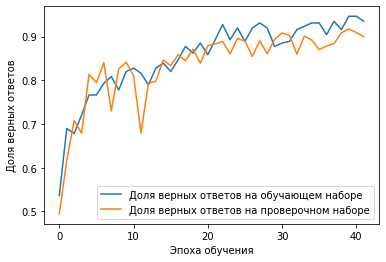

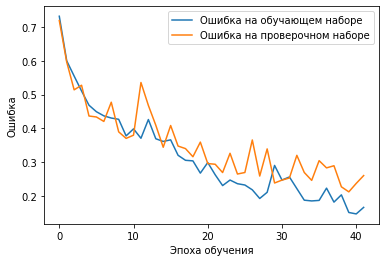

In [10]:
data_list_dense = []
layers=[1700]
activations=['relu']
adam_rate=[0.005]
batch_sizes=[32] # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов

for layer in layers:
  for activation in activations:
    for batch in batch_sizes:
      for lr in adam_rate:
      
        model = Sequential()
        
        modelcheckpoint_1 = ModelCheckpoint(filepath=f'modeldense.mcp.{layer}.{activation}.{batch}', monitor="val_accuracy", mode="max", verbose=1, save_best_only=True) # --- how to use????

        model.add(Dense(layer, input_dim=X_train.shape[1], use_bias = True, activation=activation)) 
        model.add(Dense(CLASS_COUNT, activation='softmax')) 
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=["accuracy"])
        
        # print(f'Neuron layer: {layer}, activation: {activation}, batch_size: {batch}')
        history = model.fit(X_train, y_train, epochs=42, validation_data=(X_test, y_test), shuffle = True, callbacks=[modelcheckpoint_1], batch_size=batch, verbose=1) 
        # model.load_weights(f'model.mcp.{layer}.{activation}.{batch}')


        data_list_dense.append(('Neurons:', layer, 'Activation:', activation, 'Batch: ', batch, 'Learning rate: ', lr, 
                          'Max_accuracy:', round(max(history.history['accuracy']), 2),
                          'Val_accuracy of best train accuracy:', round(history.history['val_accuracy'][np.argmax(history.history['accuracy'])], 2),
                          'Validation accuracy:', round(history.history['val_accuracy'][9], 2)))     
        
       
        print('\n\n')
        print('_________________________________________________________________')
        print(model.summary())
        # Построим графики точности на обучающей и проверочной выборках на протяжении всего обучения:
        import matplotlib.pyplot as plt    
        plt.plot(history.history['accuracy'], 
                label='Доля верных ответов на обучающем наборе')
        plt.plot(history.history['val_accuracy'], 
                label='Доля верных ответов на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Доля верных ответов')
        plt.legend()
        plt.show()

        # графики ошибки:
        plt.plot(history.history['loss'], 
                label='Ошибка на обучающем наборе')
        plt.plot(history.history['val_loss'], 
                label='Ошибка на проверочном наборе')
        plt.xlabel('Эпоха обучения')
        plt.ylabel('Ошибка')
        plt.legend()
        plt.show()

In [11]:
# Вывод результатов экспериментов  с modelcheckpoint_1
for i in data_list_dense:
    print(i)

('Neurons:', 1700, 'Activation:', 'relu', 'Batch: ', 32, 'Learning rate: ', 0.005, 'Max_accuracy:', 0.95, 'Val_accuracy of best train accuracy:', 0.92, 'Validation accuracy:', 0.84)
